In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
%matplotlib inline

In [217]:
df=pd.read_csv("imdb.csv",escapechar='\\')
df1=pd.read_csv("movie_metadata.csv")

In [218]:
df2=pd.DataFrame(columns=['Duration','Rate'])
df2['Duration']=df['duration']
df2['Rate']=df['imdbRating']
df2['Rate'].fillna(0,inplace=True)
df2['dur']=np.log10(df2['Duration'])
df2['dur'].fillna(0,inplace=True)
df2['Duration'].fillna(0,inplace=True)

In [219]:
df3=pd.DataFrame(columns=['Duration','Rate'])
df3['Duration']=df1['duration']
df3['Rate']=df1['imdb_score']
df3['Rate'].fillna(0,inplace=True)
df3['dur']=np.log10(df3['Duration'])
df3['dur'].fillna(0,inplace=True)
df3['Duration'].fillna(0,inplace=True)

In [220]:
kmeans1 = KMeans(n_clusters=3).fit(df2)
y_kmeans1= kmeans1.predict(df2)

kmeans2 = KMeans(n_clusters=3).fit(df3)
y_kmeans2= kmeans2.predict(df3)


Text(0, 0.5, 'imdbRating')

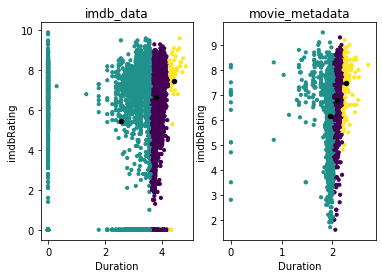

In [221]:
plt.subplot(1,2,1)
plt.scatter(df2.iloc[:, 2], df2.iloc[:, 1], c=y_kmeans1, s=10,cmap='viridis')
centers1 = kmeans1.cluster_centers_
plt.scatter(centers1[:, 2], centers1[:, 1], c='black', s=20, alpha=1.0)
plt.xlabel('Duration')
plt.ylabel('imdbRating')
plt.title("imdb_data")
plt.subplot(1,2,2)
plt.scatter(df3.iloc[:, 2], df3.iloc[:, 1], c=y_kmeans2, s=10,cmap='viridis')
centers2 = kmeans2.cluster_centers_
plt.scatter(centers2[:, 2], centers2[:, 1], c='black', s=20, alpha=1.0)
plt.title("movie_metadata")
plt.xlabel('Duration')
plt.ylabel('imdbRating')

In [223]:
df['Length']=df['wordsInTitle'].str.len()
df4=pd.DataFrame(columns=['Len','Rate'])
df4['Len']=df['Length']
df4['Rate']=df['imdbRating']
df4['Rate'].fillna(0,inplace=True)
df4['Len'].fillna(0,inplace=True)
df4['Len/10']=df4['Len']/10

Text(0.5, 1.0, 'Length of movie title Vs Its imdbRating')

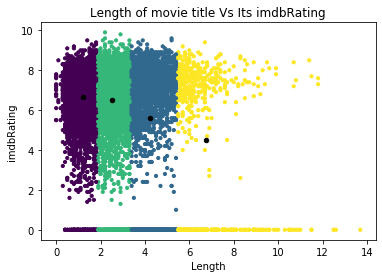

In [224]:
kmeans = KMeans(n_clusters=4).fit(df4)
y_kmeans= kmeans.predict(df4)
plt.scatter(df4.iloc[:, 2], df4.iloc[:, 1], c=y_kmeans, s=10,cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 1], c='black', s=20, alpha=1.0)
plt.xlabel('Length')
plt.ylabel('imdbRating')
plt.title('Length of movie title Vs Its imdbRating')

In [225]:
#In the above plot, it is shown that as length of the movie increases, their imdb rating decreases

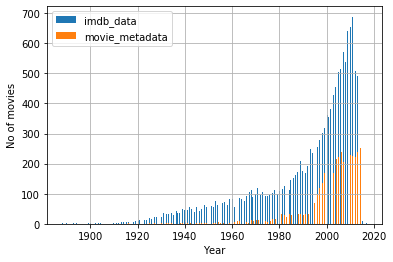

In [226]:
df['year'].hist(bins=250,rwidth=0.75,label="imdb_data")
df1['title_year'].hist(bins=250,rwidth=0.75,label="movie_metadata")
plt.xlabel("Year")
plt.ylabel("No of movies")
plt.legend()

In [227]:
new1=df1['director_facebook_likes'].sum()
new2=df1['actor_1_facebook_likes'].sum()
new3=df1['actor_2_facebook_likes'].sum()
new4=df1['actor_3_facebook_likes'].sum()

In [228]:
d={'Cast':['Actor1','Actor2','Actor3','Director'],'Likes':[new2,new3,new4,new1]}
data_frame=pd.DataFrame(d)

Text(0.5, 1.0, 'Popularity of Cast on Facebook')

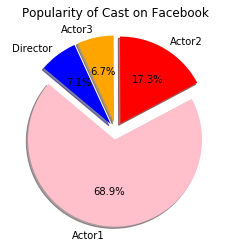

In [229]:
colors = ["pink", "red", "orange", "blue"]
explode = (0.1, 0.1, 0.1, 0.1)
Likes=data_frame['Likes']
Person=data_frame['Cast']
plt.pie(Likes, labels=Person,colors=colors,explode=explode,autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Popularity of Cast on Facebook")
